In [ ]:
# Rasin dataset으로 학습

In [ ]:
# -----------------------------
# 0) 라이브러리 import
# -----------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week3/data/Raisin_Dataset.xlsx", header=0).dropna()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [ ]:
#레이블 불균형 확인

df["Class"].value_counts()

,count
Class,
Kecimen,450
Besni,450


Text(0.5, 1.0, 'class')

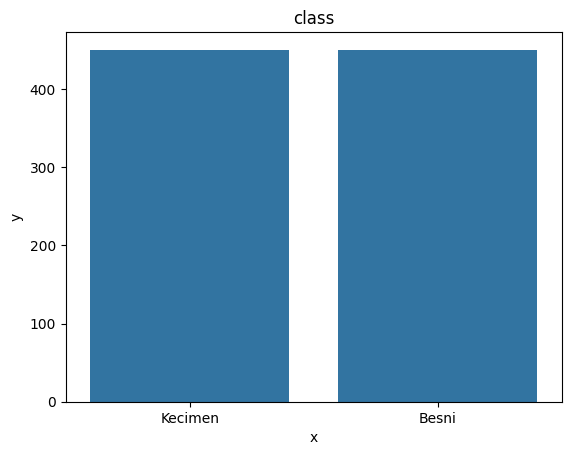

In [ ]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="Class")
plt.xlabel("x")
plt.ylabel("y")
plt.title("class")

In [ ]:
# 결측치 확인
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Area,0
MajorAxisLength,0
MinorAxisLength,0
Eccentricity,0
ConvexArea,0
Extent,0
Perimeter,0
Class,0


In [ ]:
df.columns  # 컬럼명 확인

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [ ]:
# 모든 레이블을 숫자로 변형
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [ ]:
# 입력과 출력 분리

X = df.drop(columns=["Class"])
y = df["Class"]

In [ ]:
X

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,551,553,500,558,542,811,544
1,404,446,409,469,413,299,453
2,583,554,581,448,571,102,573
3,74,54,159,108,68,394,66
4,462,254,709,33,445,890,382
...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461
896,549,546,540,508,549,99,577
897,640,517,739,174,650,722,656
898,600,633,506,683,600,177,622


In [ ]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
895,0
896,0
897,0
898,0


In [ ]:
# 훈련과 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 (전체데이터 수, 컬럼숫자) 확인

In [ ]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
# lr = LogisticRegression(max_iter=500)
# max_iter를 늘리거나 solver 변경 (기본값 lbfgs)
lr = LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

# fit 함수를 통해 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [ ]:
y_test # 정답값

,Class
502,0
637,0
701,0
237,1
707,0
...,...
499,0
538,0
780,0
702,0


In [ ]:
dt_y_pred #예측값

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1])

In [ ]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))


=== DT Test Accuracy ===
Decision Tree : 0.8444
[[71 19]
 [ 9 81]]
=== RF Test Accuracy ===
Random Forest : 0.8722
[[72 18]
 [ 5 85]]
=== LR Test Accuracy ===
Logistic Reg. : 0.8944
[[76 14]
 [ 5 85]]


In [71]:
# weather.csv 데이터셋으로 실습 (분류, 내일 비 여부)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [5]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week3/data/weather.csv", header=0).dropna()
df

#레이블 불균형 확인
df["RainTomorrow"].value_counts()


,count
RainTomorrow,
No,268
Yes,60


Text(0.5, 1.0, 'RainTomorrow')

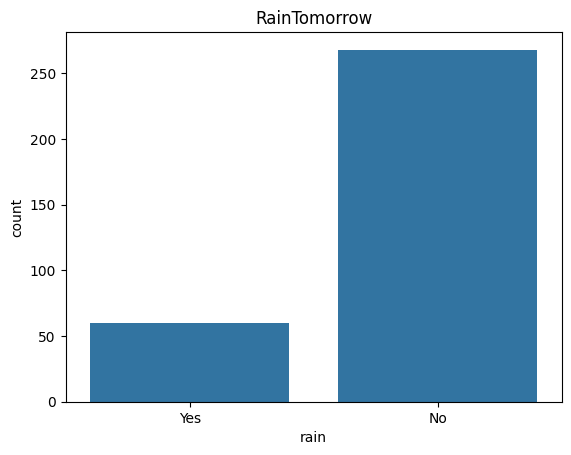

In [9]:
# 레이블 갯수 확인 (그래프)

sns.countplot(data = df, x="RainTomorrow")
plt.xlabel("rain")
plt.ylabel("count")
plt.title("RainTomorrow")

In [10]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [11]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [12]:
# 모든 레이블을 숫자로 변형
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,111,0,15,43,7,8,12,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,130,16,20,75,1,12,0,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,106,16,27,24,7,33,3,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,42,43,34,69,7,20,14,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,46,13,26,84,10,18,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,141,0,51,104,3,17,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,78,0,40,36,2,14,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,130,0,23,50,7,16,11,...,25,103,91,6,7,107,146,0,0,0


In [13]:
X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [14]:
# 훈련과 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 (전체데이터 수, 컬럼숫자) 확인

((262, 23), (66, 23), (262,), (66,))

In [72]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
# lr = LogisticRegression(max_iter=500)
# max_iter를 늘리거나 solver 변경 (기본값 lbfgs)
lr = LogisticRegression(max_iter=1000, solver='liblinear')
kmeans = KMeans(n_clusters=2, random_state=42)  # 군집 개수 2로 지정 (예: 비/비아님)

In [73]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

# fit 함수를 통해 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
kmeans.fit(X_train, y_train)

KMeans(n_clusters=2, random_state=42)

In [74]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)
kmeans_pred = kmeans.predict(X_test)

In [20]:
y_test # 정답값

,RainTomorrow
365,0
28,0
36,1
301,0
305,0
...,...
356,0
72,1
320,0
81,0


In [21]:
dt_y_pred #예측값

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [75]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)
kmeans_acc = accuracy_score(y_test, kmeans_pred)

print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

print("=== K-Means Test Accuracy ===")
print(f"K-Means : {kmeans_acc:.4f}")
print (confusion_matrix(y_test,kmeans_pred))

=== DT Test Accuracy ===
Decision Tree : 0.6515
[[43  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  

In [52]:
# weather.csv 데이터셋으로 실습 (회귀, Rainfall)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine-learning-practice/Machine-Learning-Programming/week3/data/weather.csv", header=0).dropna()
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


Text(0.5, 1.0, 'Rainfall')

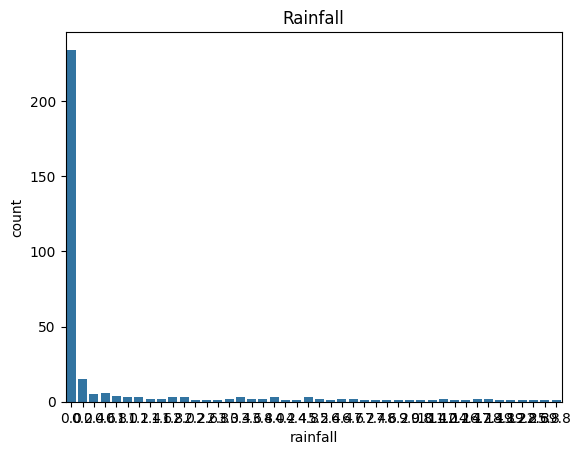

In [54]:
# 레이블 갯수 확인 (그래프)

sns.countplot(data = df, x="Rainfall")
plt.xlabel("rainfall")
plt.ylabel("count")
plt.title("Rainfall")

In [55]:
# 모든 레이블을 숫자로 변형
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,111,0,15,43,7,8,12,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,130,16,20,75,1,12,0,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,106,16,27,24,7,33,3,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,42,43,34,69,7,20,14,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,46,13,26,84,10,18,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,141,0,51,104,3,17,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,78,0,40,36,2,14,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,130,0,23,50,7,16,11,...,25,103,91,6,7,107,146,0,0,0


In [56]:
# RainTomorrow 컬럼 제거하고, Rainfall 타겟으로 설정
X = df.drop(columns=["RainTomorrow", "Rainfall"])  # Rainfall 제외하고 나머지를 feature로 사용
y = df["Rainfall"]  # Rainfall 타겟

In [57]:
# 훈련과 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 (전체데이터 수, 컬럼숫자) 확인

((262, 22), (66, 22), (262,), (66,))

In [58]:
# -----------------------------
# 2) 모델 구성
# -----------------------------

dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
lr = LinearRegression()

In [59]:
# -----------------------------
# 3) 모델 학습
# -----------------------------

# fit 함수를 통해 학습
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------

dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [61]:
y_test # 정답값

,Rainfall
254,1
110,0
281,6
9,36
93,0
...,...
279,18
60,0
126,0
292,0


In [62]:
dt_y_pred #예측값

array([ 0.,  0., 24., 29.,  0.,  0.,  0., 14., 14.,  0.,  0.,  1.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0., 37.,  0.,  0.,  0.,
        1.,  6.,  1.,  0.,  1.,  0.,  0.,  0., 29.,  0.,  0., 40.,  0.,
        0.,  0.,  0.,  0.,  0., 24.,  3.,  0.,  0.,  6.,  0., 29.,  0.,
        2.,  1.,  1.,  6.,  0.,  0., 40., 36.,  1., 21.,  0.,  0.,  1.,
       40.])

In [65]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

dt_mse = mean_squared_error(y_test, dt_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)

print("=== DT Test MSE ===")
print(f"dt_mse 평균제곱법 : {dt_mse:.4f}")
print('dt_mse 루트 평균제곱법:', np.sqrt(dt_mse))

print("=== RF Test MSE ===")
print(f"rf_mse 평균제곱법 : {rf_mse:.4f}")
print('rf_mse 루트 평균제곱법:', np.sqrt(rf_mse))

print("=== LR Test MSE ===")
print(f"lr_mse 평균제곱법 : {lr_mse:.4f}")
print('lr_mse 루트 평균제곱법:', np.sqrt(lr_mse))

=== DT Test MSE ===
dt_mse 평균제곱법 : 79.8636
dt_mse 루트 평균제곱법: 8.936645699793427
=== RF Test MSE ===
rf_mse 평균제곱법 : 36.1361
rf_mse 루트 평균제곱법: 6.011330841406792
=== LR Test MSE ===
lr_mse 평균제곱법 : 33.9566
lr_mse 루트 평균제곱법: 5.827228224790611


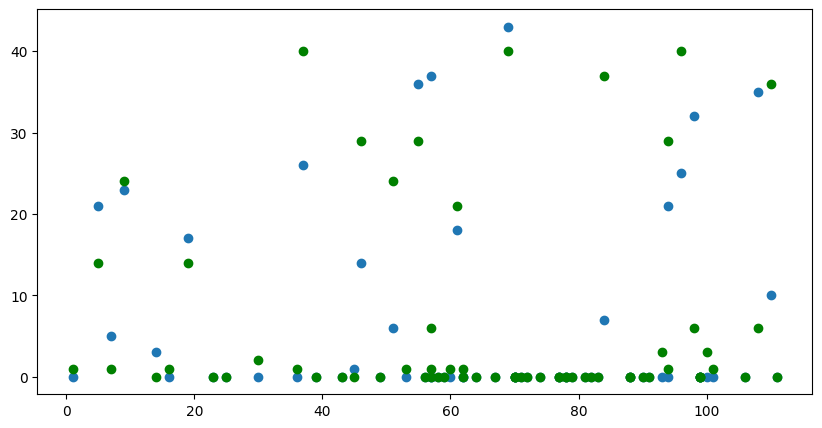

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Sunshine'], y_test, label='y_test')
plt.scatter(X_test['Sunshine'], dt_y_pred, c='g', label='dt_y_pred')
plt.show()

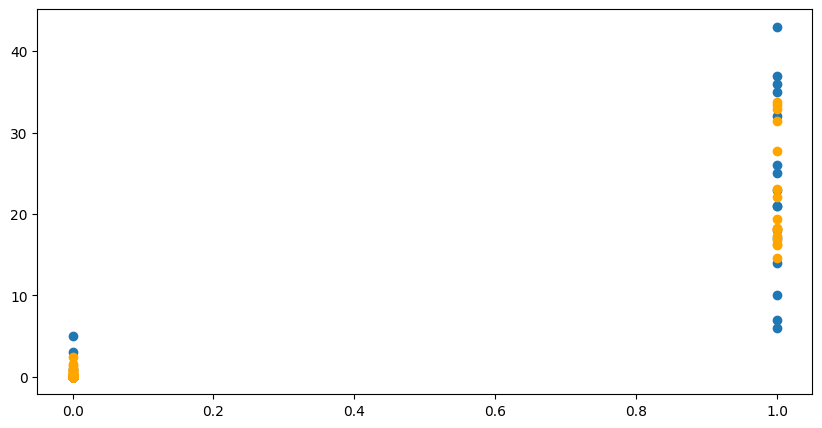

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Sunshine'], y_test, label='y_test')
plt.scatter(X_test['Sunshine'], rf_y_pred, c='orange', label='rf_y_pred')
plt.show()

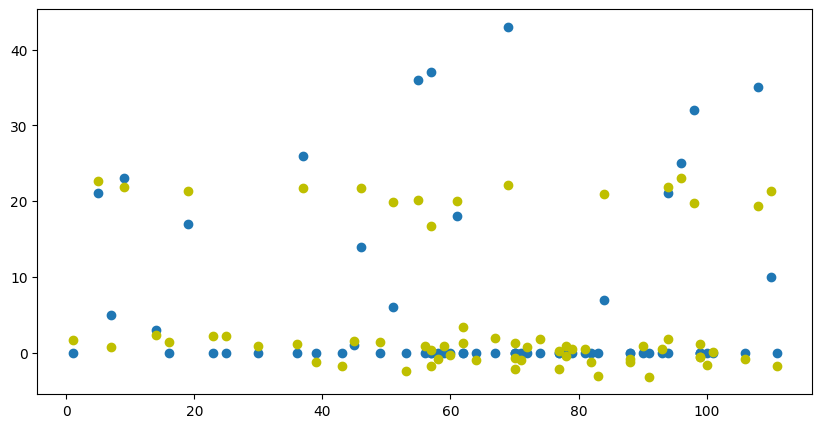

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Sunshine'], y_test, label='y_test')
plt.scatter(X_test['Sunshine'], lr_y_pred, c='y', label='lr_y_pred')
plt.show()